In [11]:
from anp.ANP import ANP
from anp.MatricaUsporedbi import MatricaUsporedbi
from anp.MatricaZavisnosti import MatricaZavisnosti
from generator.Generetor import Generator
from snap.SNAP import SNAP
import pandas as pd
import numpy as np
from scipy.stats import rankdata
import csv
import ast
import matplotlib.pyplot as plt

In [2]:
header = ['ANP1', 'ANP2', 'ANP3', 'ANP4', 'SNAP1', 'min_ANP', 'max_ANP',
              'R1_min', 'R1_max', 'SNAP1_elem_R1',
              'R2_min', 'R2_max', 'SNAP_elem_R2',
              'R3_min', 'R3_max', 'SNAP_elem_R3',
              'rank_ANP1', 'rank_ANP2', 'rank_ANP3', 'rank_ANP4', 'rank_SNAP1']
df = pd.DataFrame(columns=header)

In [18]:
with open("prezivjele.csv", "r") as csvUsporedbe, open("zavisnosti.csv", "r") as csvZavisnosti:
    usporedbeReader = csv.reader(csvUsporedbe, delimiter=';')
    zavisnostiReader = csv.reader(csvZavisnosti, delimiter=';')
    counter = 0
    for usporedba in usporedbeReader:
        usp = MatricaUsporedbi(Generator.izradiMatUsporedbe(ast.literal_eval(usporedba[0]), 4))
        for zavisnost in zavisnostiReader:
            zav = MatricaZavisnosti(Generator.izradiMatZavisnosti(ast.literal_eval(zavisnost[0]), 4))
            anp1 = ANP(usp, zav)
            anp1.simulate()
            anp2 = ANP(usp, zav)
            anp2.simulate(fiktivnaAlt=True, matricaPrijelaza=False)
            anp3 = ANP(usp, zav)
            anp3.simulate(fiktivnaAlt=False, matricaPrijelaza=True)
            anp4 = ANP(usp, zav)
            anp4.simulate(matricaPrijelaza=True, fiktivnaAlt=True)
            snap = SNAP(usp, zav)
            snap.simulate()

            anp_array = np.hstack((anp1.tezine, anp2.tezine, anp3.tezine, anp4.tezine))
            min_anp = np.amin(anp_array, axis=1)
            max_anp = np.amax(anp_array, axis=1)

            r1_min = min_anp * 0.9
            r1_max = max_anp * 1.1
            snap_elem_r1 = np.average(np.logical_and(snap.tezine <= r1_max, snap.tezine >= r1_min))

            r2_min = (min_anp - 0.05).clip(min=0) # ako razlika daje rezultat ispod nule, postavi na nulu
            r2_max = max_anp + 0.05
            snap_elem_r2 = np.average(np.logical_and(snap.tezine <= r2_max, snap.tezine >= r2_min))

            r3_min = (min_anp - 0.1).clip(min=0) # ako razlika daje rezultat ispod nule, postavi na nulu
            r3_max = max_anp + 0.1
            snap_elem_r3 = np.average(np.logical_and(snap.tezine <= r3_max, snap.tezine >= r3_min))

            rank_anp1 = rankdata(anp1.tezine, method='ordinal')
            rank_anp2 = rankdata(anp2.tezine, method='ordinal')
            rank_anp3 = rankdata(anp3.tezine, method='ordinal')
            rank_anp4 = rankdata(anp4.tezine, method='ordinal')
            rank_snap1 = rankdata(snap.tezine, method='ordinal')

            df = df.append(pd.DataFrame([{'ANP1': anp1.tezine.flatten(), 'ANP2': anp2.tezine.flatten(),
                                     'ANP3': anp3.tezine.flatten(), 'ANP4': anp4.tezine.flatten(),
                                     'SNAP1': snap.tezine.flatten(), 'min_ANP': min_anp, 'max_ANP': max_anp,
                                     'R1_min': r1_min, 'R1_max': r1_max, 'SNAP1_elem_R1': snap_elem_r1,
                                     'R2_min': r2_min, 'R2_max': r2_max, 'SNAP_elem_R2': snap_elem_r2,
                                     'R3_min': r3_min, 'R3_max': r3_max, 'SNAP_elem_R3': snap_elem_r3,
                                     'rank_ANP1': rank_anp1, 'rank_ANP2': rank_anp2, 'rank_ANP3': rank_anp3,
                                     'rank_ANP4': rank_anp4, 'rank_SNAP1': rank_snap1}]))
            counter += 1
    
    print(counter)


1820


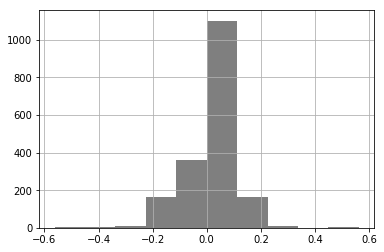

In [12]:
df['SNAP1_elem_R1'].diff().hist(color='k', alpha=0.5, bins=10)
plt.figure()

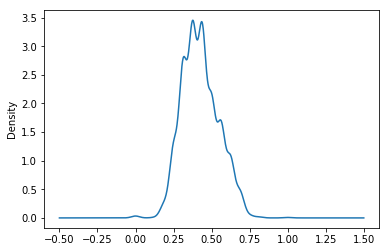

In [16]:
df['SNAP1_elem_R1'].plot.kde()
plt.figure()

38220